##Housing Price Prediction
##Problem Statement

This assignment is a programming assignment wherein you have to build a regression model using regularisation(ridge and lasso regression) in order to predict the actual value of the prospective properties in Australia and decide whether to invest in them or not.

A US-based housing company named Surprise Housing has decided to enter the Australian market. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

#Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the bike sharing dataset

In [921]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [1036]:
!pip show statsmodels

Name: statsmodels
Version: 0.12.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, pandas, patsy, numpy
Required-by: plotnine


In [1037]:
# Version of pandas library

!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc, prophet, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fastai, datascience, cufflinks, cmdstanpy, arviz, altair


In [1038]:
# Version of matplotlib library

!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, kiwisolver, pyparsing, cycler, numpy
Required-by: yellowbrick, wordcloud, seaborn, scikit-image, pycocotools, prophet, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fastai, descartes, datascience, daft, arviz


In [1039]:
# Version of seaborn library

!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pandas, scipy, matplotlib
Required-by: missingno


In [922]:
#Please add file path location of the day.csv data file
# replace the <location of the dataset> with the original location of dataset in the running system
houseprice_location = "/content/sample_data/train.csv"
house_price_df = pd.read_csv(houseprice_location)

In [923]:
house_price_df.shape

(1460, 81)

In [924]:
# summary of the dataset: 1460 rows, 81 columns, no null values
print(house_price_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [925]:
# head
house_price_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#Step 2: Visualising and Cleaning the Data

In [926]:
# 'Alley','PoolQC','Fence','MiscFeature' columns have most of the columns as NaN and 'Id' column is just index column. So we can drop these columns
house_price_df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [927]:
house_price_df['GarageCond'] = house_price_df['GarageCond'].fillna('NoGarage')

In [928]:
house_price_df['GarageQual'] = house_price_df['GarageQual'].fillna('NoGarag')

In [929]:
house_price_df['GarageFinish'] = house_price_df['GarageFinish'].fillna('NoGar')

In [930]:
house_price_df['GarageType'] = house_price_df['GarageType'].fillna('NoG')

In [931]:
house_price_df['FireplaceQu'] = house_price_df['FireplaceQu'].fillna('NoFirep')
house_price_df['FireplaceQu'].value_counts()

NoFirep    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQu, dtype: int64

In [932]:
house_price_df['BsmtFinType2'] = house_price_df['BsmtFinType2'].fillna('NoBasement')

In [933]:
house_price_df['BsmtFinType1'] = house_price_df['BsmtFinType1'].fillna('NoBase')

In [934]:
house_price_df['BsmtExposure'] = house_price_df['BsmtExposure'].fillna('NoBas')

In [935]:
house_price_df['BsmtCond'] = house_price_df['BsmtCond'].fillna('NoBasmnt')

In [936]:
house_price_df['BsmtQual'] = house_price_df['BsmtQual'].fillna('NoB')

In [937]:
house_price_df['MSSubClass'] = house_price_df['MSSubClass'].map({20:'1-STORY-1946', 30:'1-STORY-1945', 40:'1-STORY-W/FINISHED', 45:'1-Half-STORY-UNFINISHED',50:'1-Half-STORY-FINISHED', 60:'2-STORY-1946', 70:'2-STORY-1945', 75:'2-Half-STORY',80:'SPLIT-MULTI-LEVEL',85:'SPLIT-FOYER', 90:'DUPLEX-ALL-STYLES', 120:'1-STORY-PUD', 150:'1-Half-STORY-PUD', 160:'2-STORY-PUD', 180:'PUD-MULTILEVEL', 190:'2-FAMILY-CONVERSION'})

In [938]:
house_price_df['MoSold'] = house_price_df['MoSold'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June',7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [939]:
house_price_df['LotFrontage'] = house_price_df['LotFrontage'].fillna(house_price_df['LotFrontage'].median())

In [940]:
house_price_df['GarageYrBlt'] = house_price_df['GarageYrBlt'].fillna(house_price_df['GarageYrBlt'].median())

In [941]:
# dropping the rows having NaN values
house_price_df = house_price_df.dropna()
 
# To reset the indices
house_price_df = house_price_df.reset_index(drop = True)

In [942]:
print(house_price_df['PoolArea'].value_counts())
print(house_price_df['MiscVal'].value_counts())
print(house_price_df['3SsnPorch'].value_counts())
print(house_price_df['LowQualFinSF'].value_counts())
print(house_price_df['KitchenAbvGr'].value_counts())

0      1444
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1399
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1427
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64
0      1425
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384    

In [943]:
# drop 'PoolArea','MiscVal','3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr' columns as it dominated by one value
house_price_df = house_price_df.drop(['PoolArea','MiscVal','3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr'],axis=1)

In [944]:
house_price_df.shape

(1451, 71)

In [945]:
house_price_df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1451.000000    1451.000000  1451.000000  1451.000000  1451.000000   
mean     69.845624   10507.808408     6.093728     5.579600  1971.092350   
std      22.044429    9992.987081     1.381467     1.113415    30.190266   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      60.000000    7537.500000     5.000000     5.000000  1954.000000   
50%      69.000000    9477.000000     6.000000     5.000000  1972.000000   
75%      79.000000   11600.000000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd  MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1451.000000  1451.00000  1451.000000  1451.000000  1451.000000  ...   
mean    1984.760165   103.75672   442.274983    46.838043   567.197105  ...   
std       20.651334   181.10815   455.369276   161.777324   442.209192  ...   
min     1950.000000     0.00000     0.000000     0.000000     0.000000  ...   
25%     1966.000000     0.00000     0.000000     0.000000   222.000000  ...   
50%     1993.000000     0.00000   381.000000     0.000000   479.000000  ...   
75%     2004.000000   166.00000   707.000000     0.000000   808.000000  ...   
max     2010.000000  1600.00000  5644.000000  1474.000000  2336.000000  ...   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1451.000000  1451.000000  1451.000000  1451.000000  1451.000000   
mean      0.612681  1978.445210     1.764990   472.525155    94.412819   
std       0.643443    23.989371     0.748728   214.171752   125.436852   
min       0.000000  1900.000000     0.000000     0.000000     0.000000   
25%       0.000000  1962.000000     1.000000   327.500000     0.000000   
50%       1.000000  1980.000000     2.000000   478.000000     0.000000   
75%       1.000000  2001.000000     2.000000   576.000000   168.000000   
max       3.000000  2010.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch  ScreenPorch       YrSold      SalePrice  
count  1451.000000    1451.000000  1451.000000  1451.000000    1451.000000  
mean     46.422467      21.952447    15.154376  2007.815300  180624.101999  
std      66.060150      61.108223    55.917522     1.329376   79312.128273  
min       0.000000       0.000000     0.000000  2006.000000   34900.000000  
25%       0.000000       0.000000     0.000000  2007.000000  129900.000000  
50%      24.000000       0.000000     0.000000  2008.000000  162500.000000  
75%      68.000000       0.000000     0.000000  2009.000000  214000.000000  
max     547.000000     552.000000   480.000000  2010.000000  755000.000000  

[8 rows x 30 columns]

In [946]:
print(house_price_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   object 
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [947]:
categoricalCols = house_price_df.select_dtypes(include=['object']).columns
print(categoricalCols)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [948]:
house_price_df[categoricalCols]

MSSubClass MSZoning Street LotShape LandContour Utilities  \
0                2-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
1                1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
2                2-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
3                2-STORY-1945       RL   Pave      IR1         Lvl    AllPub   
4                2-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
5       1-Half-STORY-FINISHED       RL   Pave      IR1         Lvl    AllPub   
6                1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
7                2-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
8       1-Half-STORY-FINISHED       RM   Pave      Reg         Lvl    AllPub   
9         2-FAMILY-CONVERSION       RL   Pave      Reg         Lvl    AllPub   
10               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
11               2-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
12               1-STORY-1946       RL   Pave      IR2         Lvl    AllPub   
13               1-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
14               1-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
15    1-Half-STORY-UNFINISHED       RM   Pave      Reg         Lvl    AllPub   
16               1-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
17          DUPLEX-ALL-STYLES       RL   Pave      Reg         Lvl    AllPub   
18               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
19               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
20               2-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
21    1-Half-STORY-UNFINISHED       RM   Pave      Reg         Bnk    AllPub   
22               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
23                1-STORY-PUD       RM   Pave      Reg         Lvl    AllPub   
24               1-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
25               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
26               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
27               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
28               1-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
29               1-STORY-1945       RM   Pave      IR1         Lvl    AllPub   
30               2-STORY-1945  C (all)   Pave      Reg         Lvl    AllPub   
31               1-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
32               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
33               1-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
34                1-STORY-PUD       RL   Pave      Reg         Lvl    AllPub   
35               2-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
36               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
37               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
38               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
39          DUPLEX-ALL-STYLES       RL   Pave      Reg         Lvl    AllPub   
40               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
41               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
42                SPLIT-FOYER       RL   Pave      IR1         Lvl    AllPub   
43               1-STORY-1946       RL   Pave      IR1         Lvl    AllPub   
44               1-STORY-1946       RL   Pave      Reg         Lvl    AllPub   
45                1-STORY-PUD       RL   Pave      Reg         Lvl    AllPub   
46      1-Half-STORY-FINISHED       RL   Pave      IR1         Lvl    AllPub   
47               1-STORY-1946       FV   Pave      Reg         Lvl    AllPub   
48        2-FAMILY-CONVERSION       RM   Pave      Reg         Lvl    AllPub   
49               1-

In [949]:
numericCols = house_price_df._get_numeric_data().columns
print(numericCols)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold', 'SalePrice'],
      dtype='object')


In [950]:
house_price_df[numericCols]

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
5            85.0    14115            5            5       1993          1995   
6            75.0    10084            8            5       2004          2005   
7            69.0    10382            7            6       1973          1973   
8            51.0     6120            7            5       1931          1950   
9            50.0     7420            5            6       1939          1950   
10           70.0    11200            5            5       1965          1965   
11           85.0    11924            9            5       2005          2006   
12           69.0    12968            5            6       1962          1962   
13           91.0    10652            7            5       2006          2007   
14           69.0    10920            6            5       1960          1960   
15           51.0     6120            7            8       1929          2001   
16           69.0    11241            6            7       1970          1970   
17           72.0    10791            4            5       1967          1967   
18           66.0    13695            5            5       2004          2004   
19           70.0     7560            5            6       1958          1965   
20          101.0    14215            8            5       2005          2006   
21           57.0     7449            7            7       1930          1950   
22           75.0     9742            8            5       2002          2002   
23           44.0     4224            5            7       1976          1976   
24           69.0     8246            5            8       1968          2001   
25          110.0    14230            8            5       2007          2007   
26           60.0     7200            5            7       1951          2000   
27           98.0    11478            8            5       2007          2008   
28           47.0    16321            5            6       1957          1997   
29           60.0     6324            4            6       1927          1950   
30           50.0     8500            4            4       1920          1950   
31           69.0     8544            5            6       1966          2006   
32           85.0    11049            8            5       2007          2007   
33           70.0    10552            5            5       1959          1959   
34           60.0     7313            9            5       2005          2005   
35          108.0    13418            8            5       2004          2005   
36          112.0    10859            5            5       1994          1995   
37           74.0     8532            5            6       1954          1990   
38           68.0     7922            5            7       1953          2007   
39           65.0     6040            4            5       1955          1955   
40           84.0     8658            6            5       1965          1965   
41          115.0    16905            5            6       1959          1959   
42           69.0     9180            5            7       1983          1983   
43           69.0     9200            5            6       1975          1980   
44           70.0     7945            5            6       1959          1959   
45           61.0     7658            9            5       2005          2005   
46           48.0    12822            7            5       2003          2003   
47           84.0    11096            8            5       2006          2006   
48           33.0     4456           

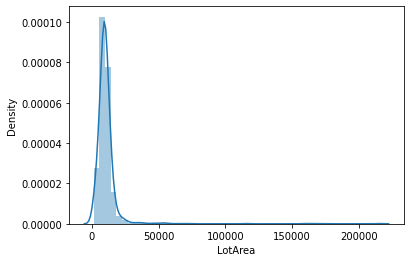

In [951]:
# LotArea: Lot size in square feet
sns.distplot(house_price_df['LotArea'])
plt.show()

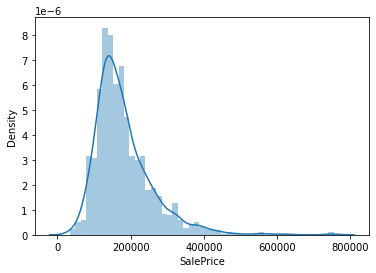

In [952]:
# SalePrice columns
plt.figure()
sns.distplot(house_price_df['SalePrice'])
plt.show()

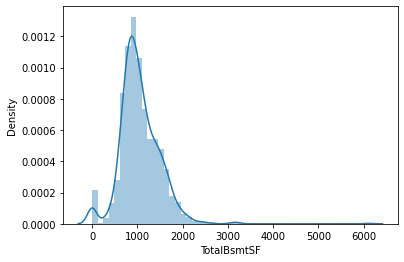

In [953]:
# TotalBsmtSF: Total square feet of basement area
sns.distplot(house_price_df['TotalBsmtSF'])
plt.show()

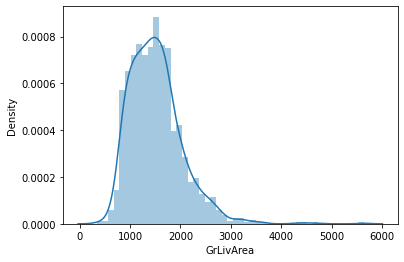

In [954]:
# TotalBsmtSF: Total square feet of basement area
sns.distplot(house_price_df['GrLivArea'])
plt.show()

In [955]:
#remove the outlier using IQR 
Q1 = house_price_df[numericCols].quantile(0.05)
Q3 = house_price_df[numericCols].quantile(0.95)
IQR = Q3 - Q1

house_price_df = house_price_df[~((house_price_df[numericCols] < (Q1 - 1.5 * IQR)) |(house_price_df[numericCols] > (Q3 + 1.5 * IQR))).any(axis=1)]

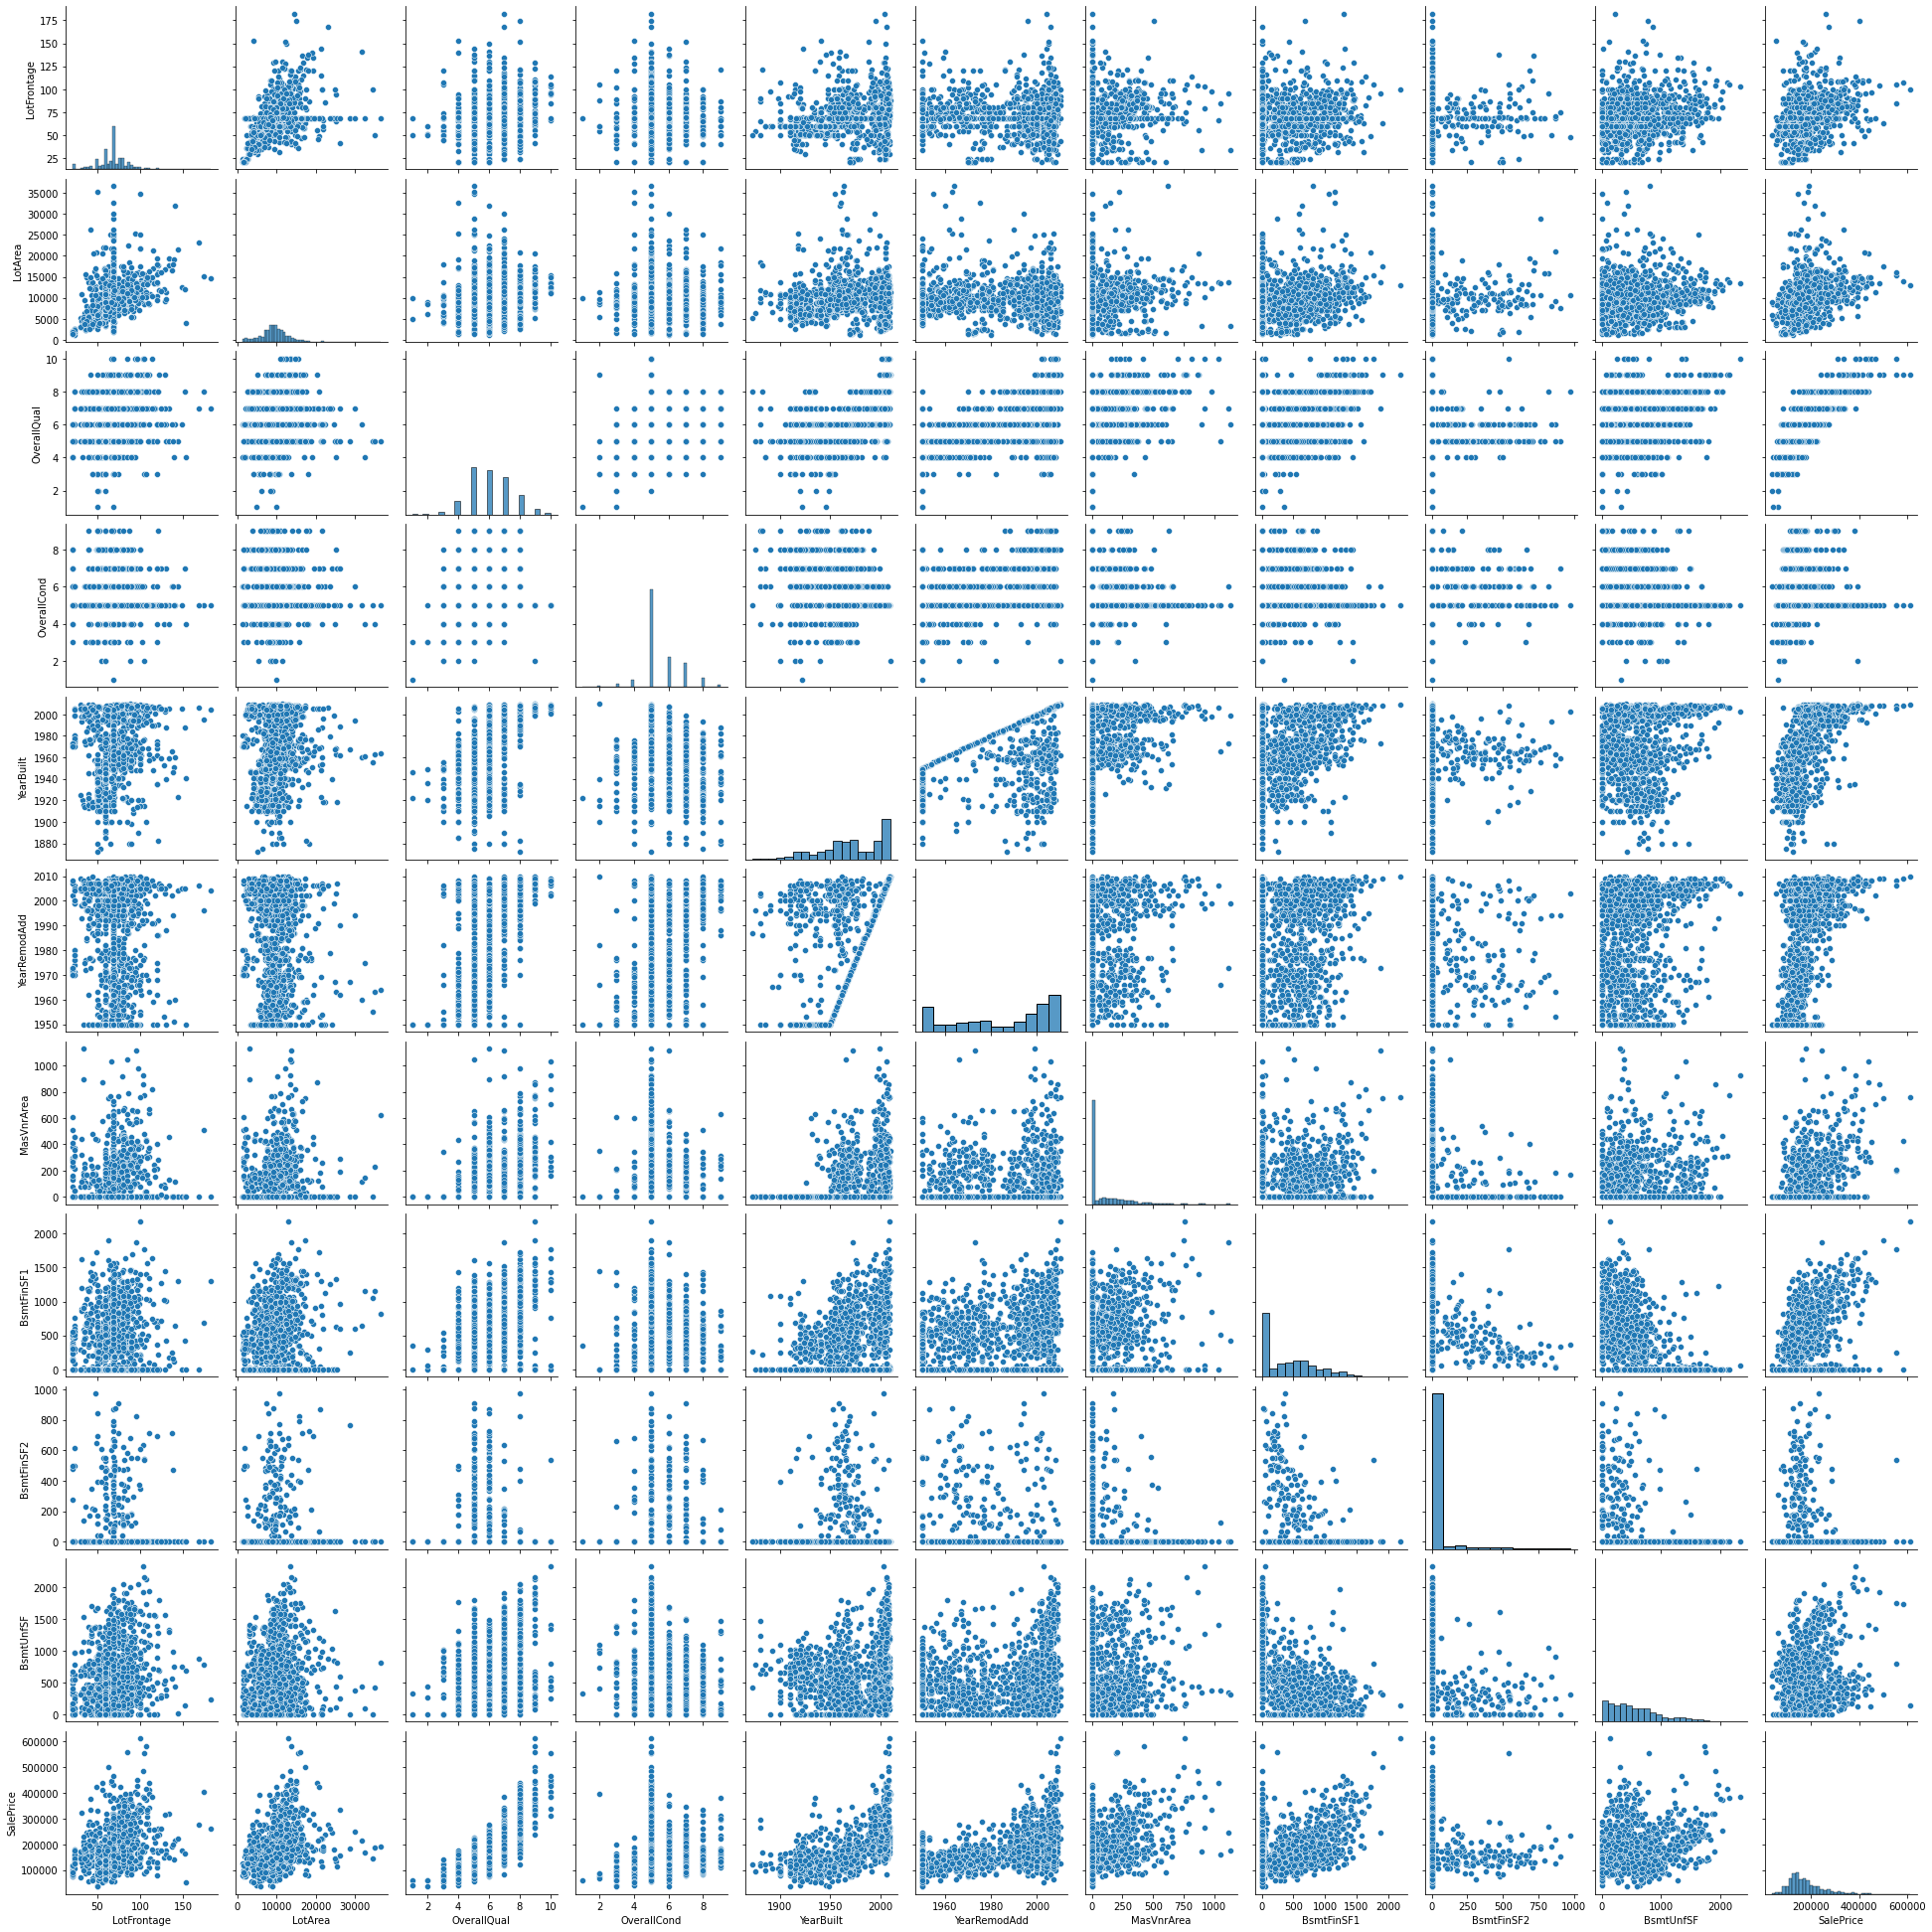

In [956]:
#First set of pairplot for numerical variables
sns.pairplot(house_price_df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt','YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','SalePrice']])
plt.show()

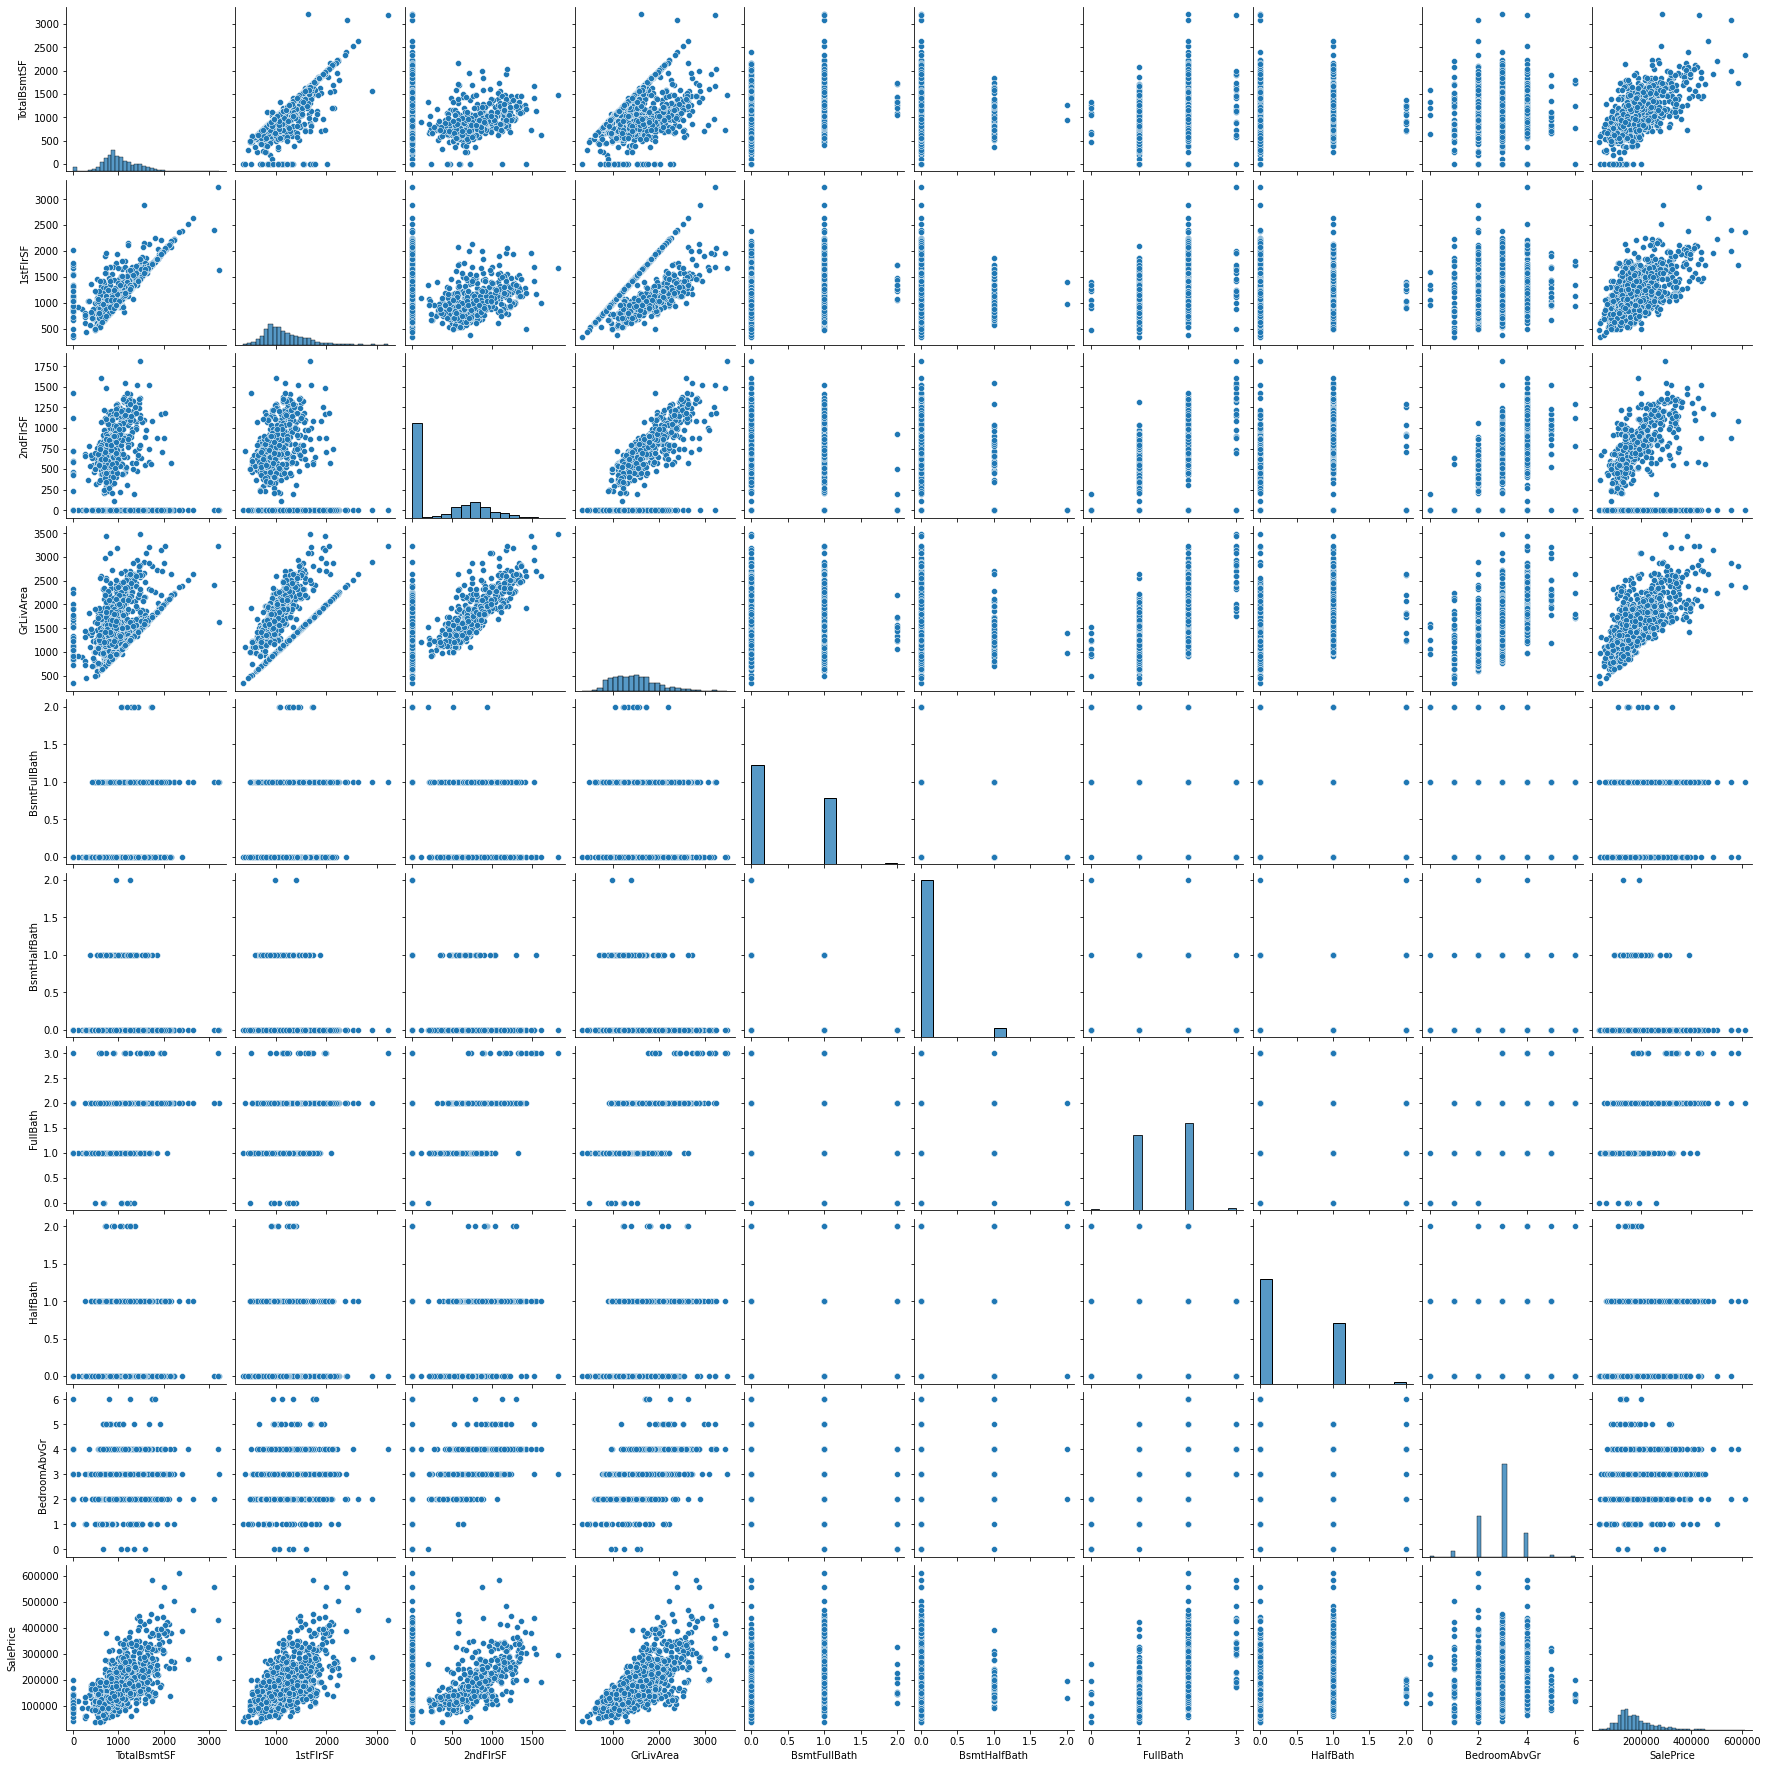

In [957]:
#Second set of pairplot for numerical variables
sns.pairplot(house_price_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','SalePrice']])
plt.show()

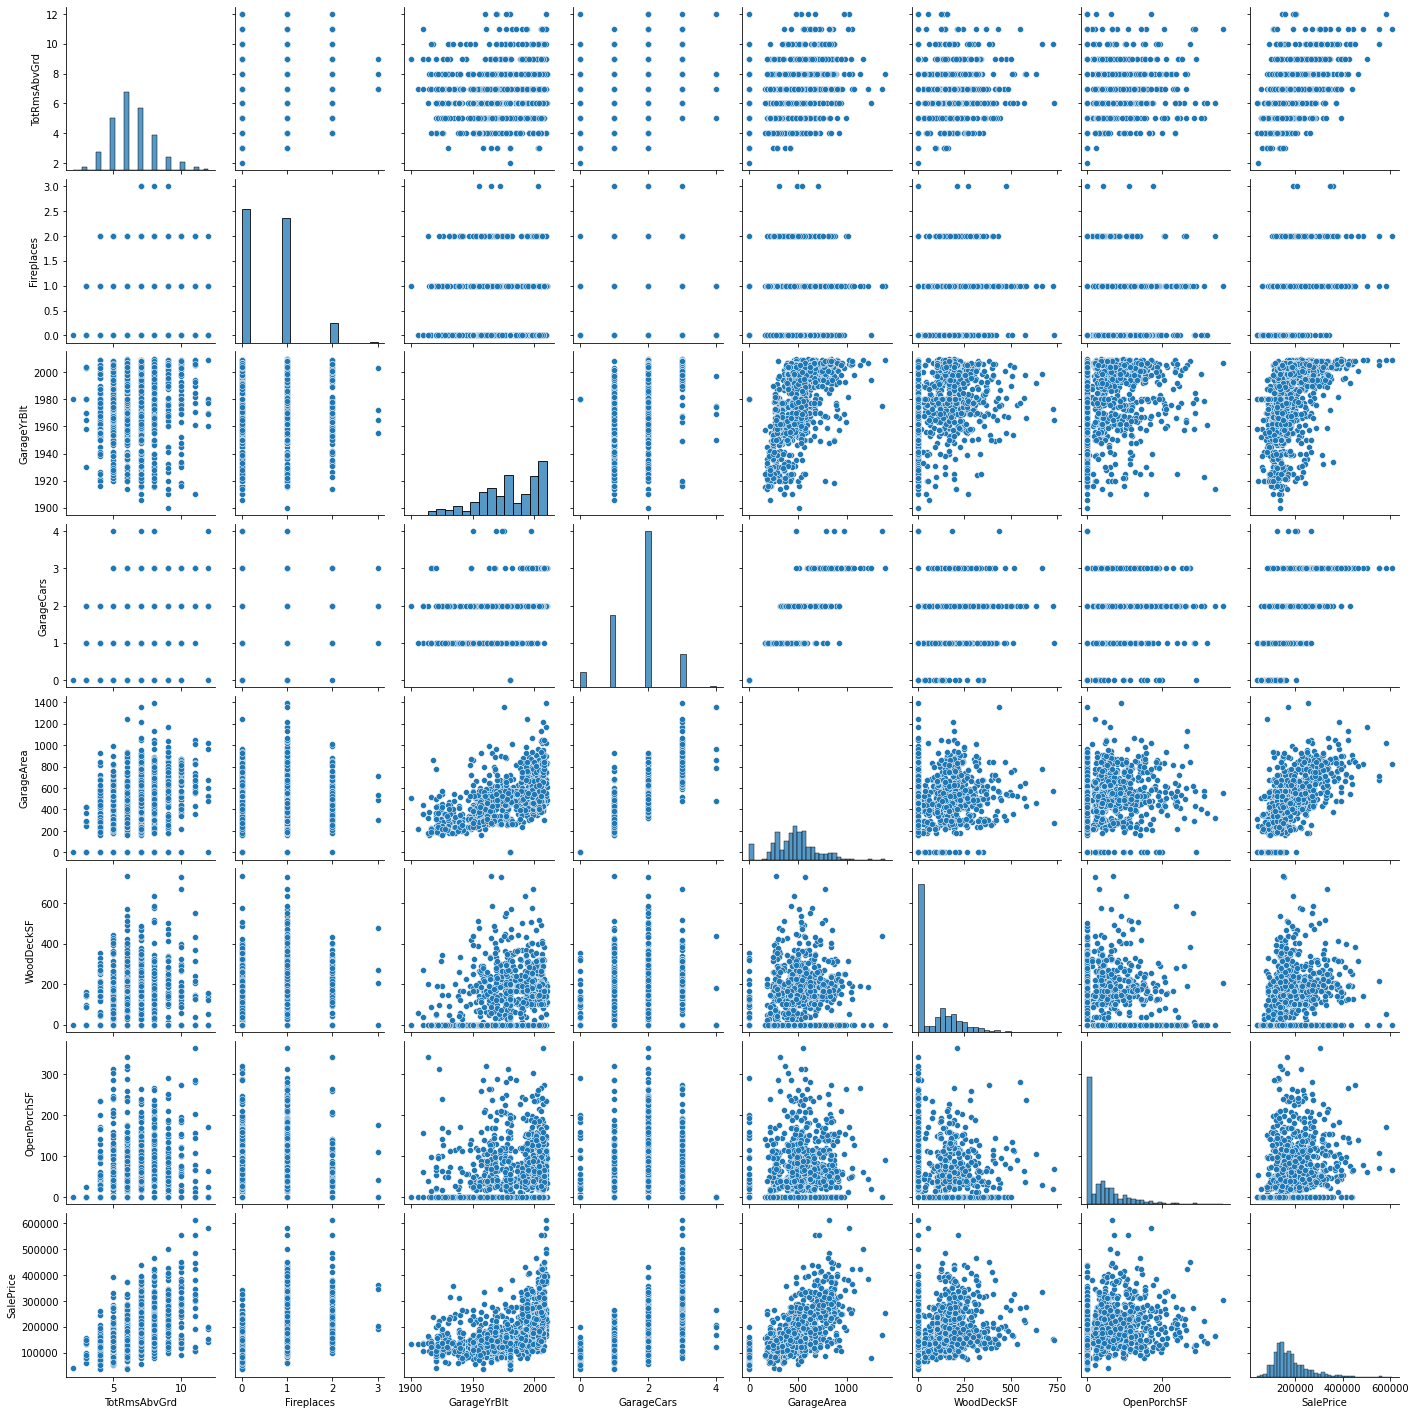

In [958]:
#Third set of pairplot for numerical variables
sns.pairplot(house_price_df[['TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','SalePrice']])
plt.show()

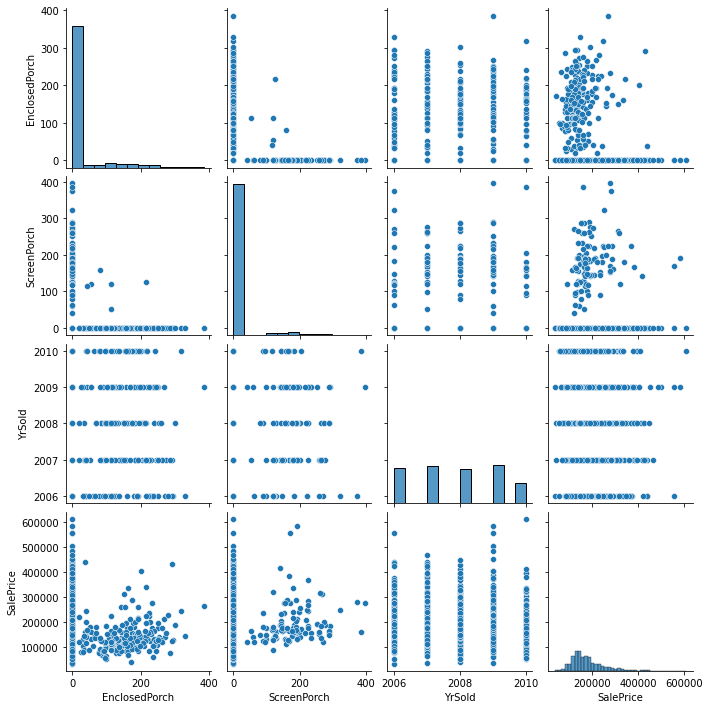

In [959]:
#Fourth set of pairplot for numerical variables
sns.pairplot(house_price_df[['EnclosedPorch', 'ScreenPorch', 'YrSold','SalePrice']])
plt.show()

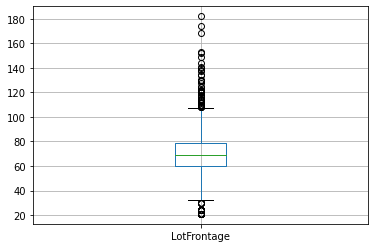

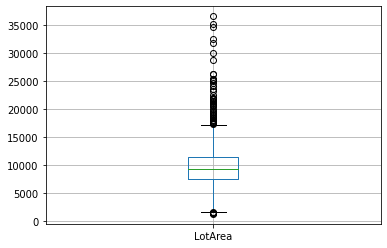

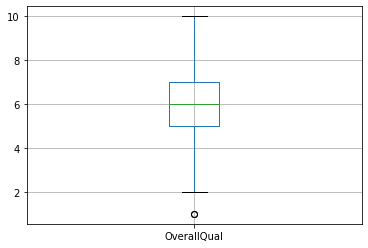

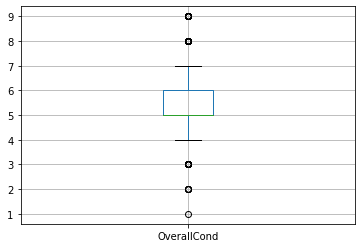

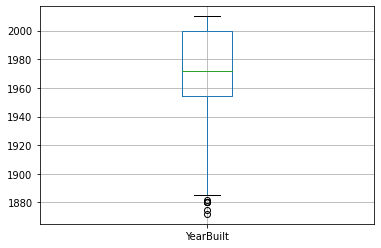

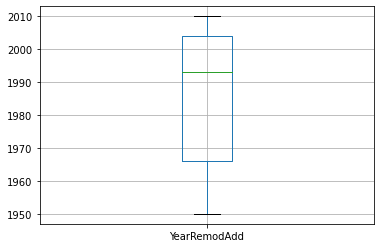

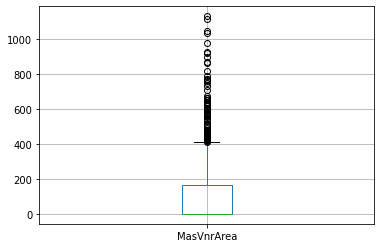

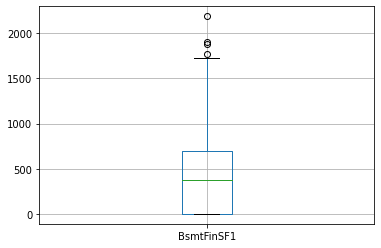

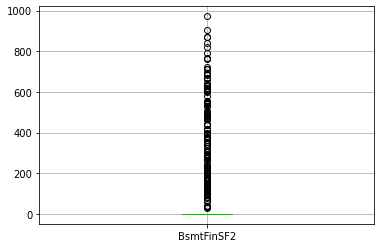

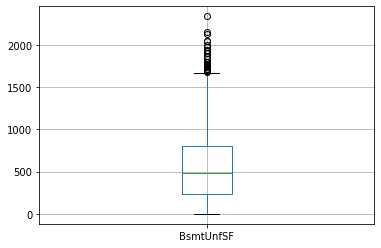

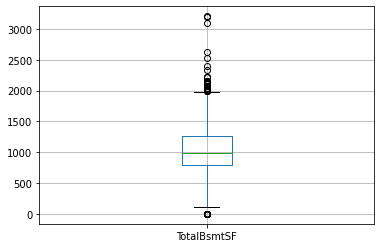

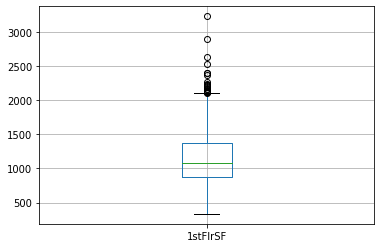

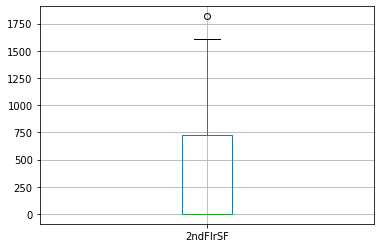

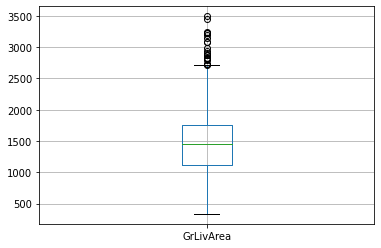

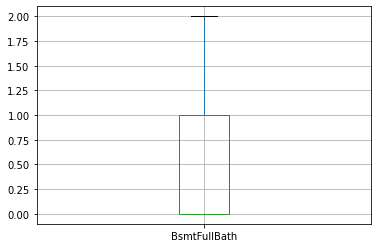

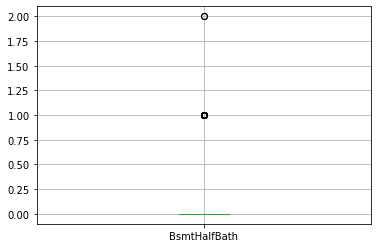

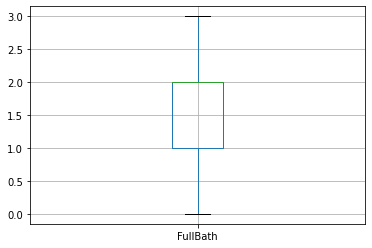

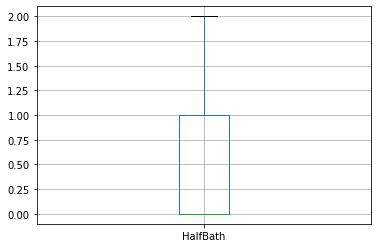

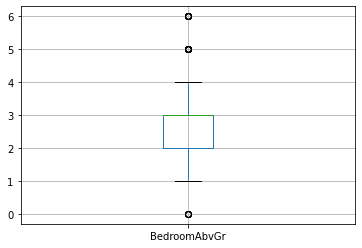

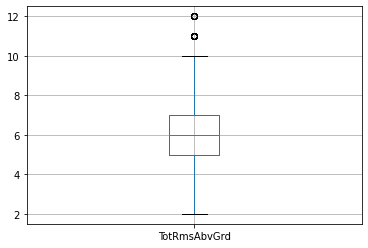

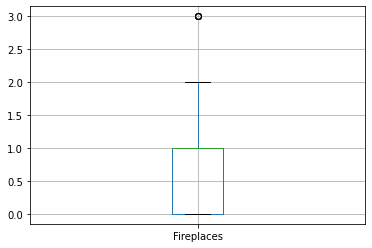

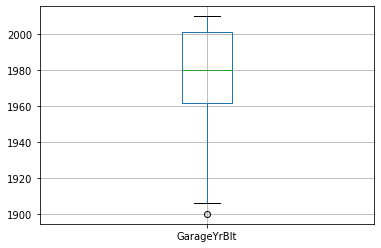

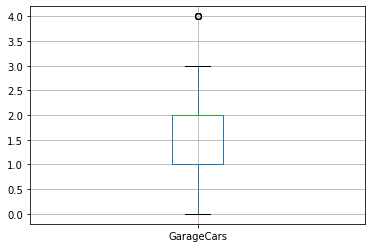

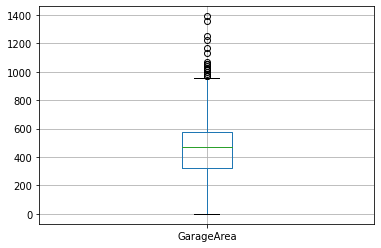

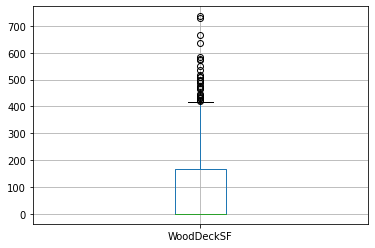

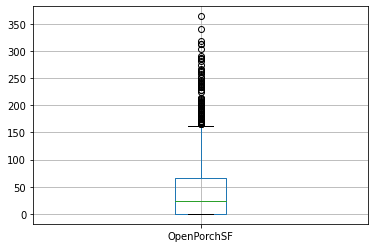

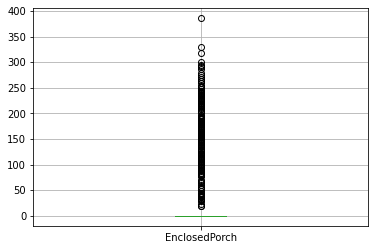

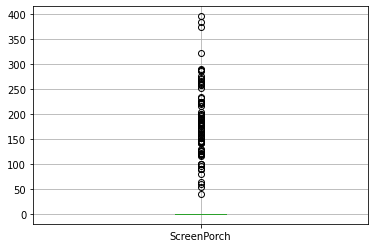

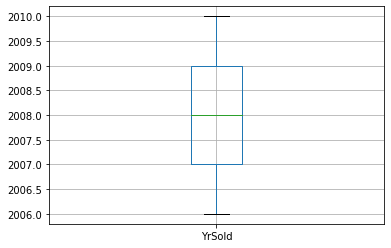

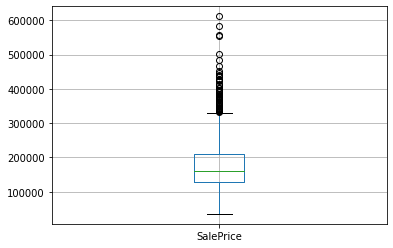

In [960]:
for column in numericCols:
    plt.figure()
    house_price_df.boxplot([column])

#Step 3: Data Preparation

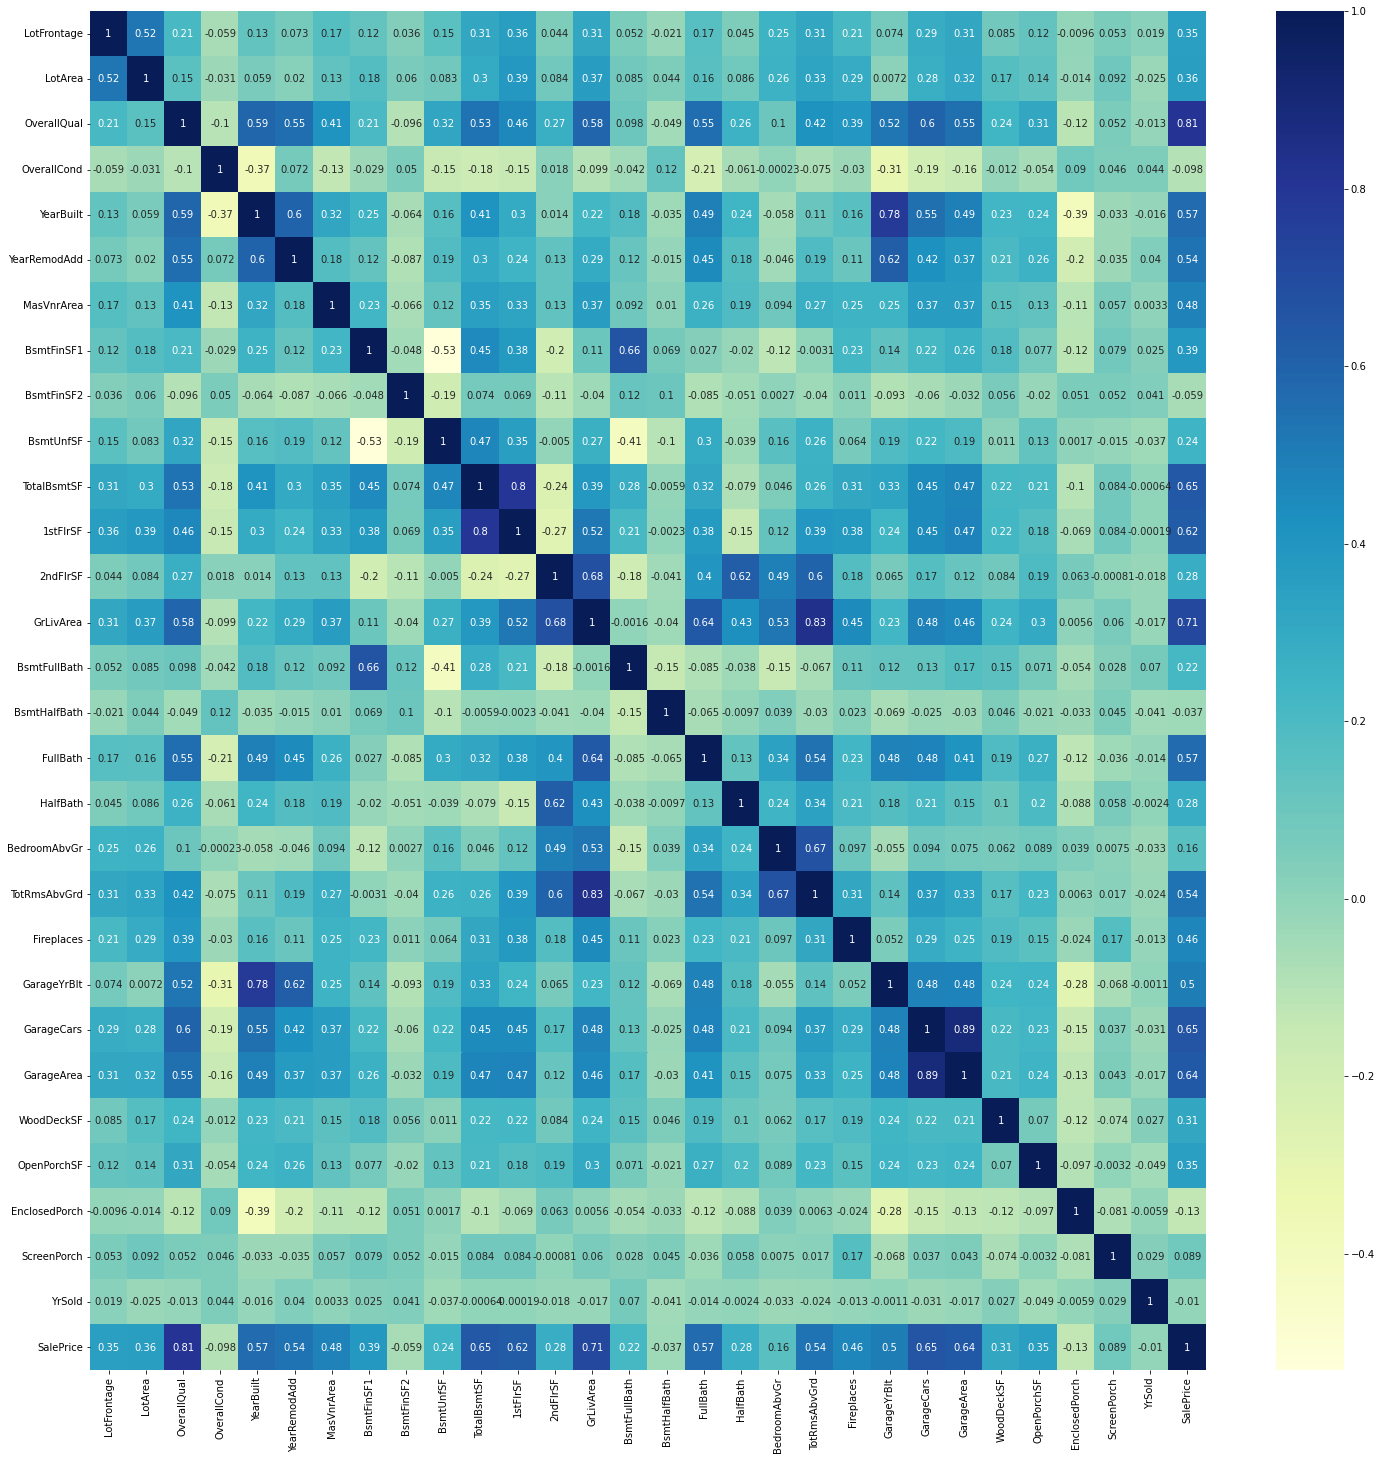

In [961]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(house_price_df[numericCols].corr(), annot = True, cmap="YlGnBu")
plt.show()

##Dummy Variables
creating dummy variables for all categorical variables

In [962]:
#Create an instance of One-hot-encoder
#from sklearn.preprocessing import OneHotEncoder
#enc=OneHotEncoder()
dummy_encoded_data = pd.get_dummies(house_price_df[categoricalCols])


In [963]:
list(dummy_encoded_data.columns)

['MSSubClass_1-Half-STORY-FINISHED',
 'MSSubClass_1-Half-STORY-UNFINISHED',
 'MSSubClass_1-STORY-1945',
 'MSSubClass_1-STORY-1946',
 'MSSubClass_1-STORY-PUD',
 'MSSubClass_1-STORY-W/FINISHED',
 'MSSubClass_2-FAMILY-CONVERSION',
 'MSSubClass_2-Half-STORY',
 'MSSubClass_2-STORY-1945',
 'MSSubClass_2-STORY-1946',
 'MSSubClass_2-STORY-PUD',
 'MSSubClass_DUPLEX-ALL-STYLES',
 'MSSubClass_PUD-MULTILEVEL',
 'MSSubClass_SPLIT-FOYER',
 'MSSubClass_SPLIT-MULTI-LEVEL',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'N

In [964]:
#enc_data=pd.DataFrame(enc.fit_transform(house_price_df[categoricalCols]).toarray())
  
#Merge with main
#house_price_df=house_price_df.join(enc_data)
house_price_df = pd.concat([house_price_df, dummy_encoded_data], axis = 1)

In [965]:
# Drop 'season' as we have created the dummies for it

house_price_df.drop(categoricalCols, axis = 1, inplace = True)

In [966]:
house_price_df.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0       196.0         706           0        150  ...               0   
1         0.0         978           0        284  ...               0   
2       162.0         486           0        434  ...               0   
3         0.0         216           0        540  ...               0   
4       350.0         655           0        490  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 303 columns]

In [967]:
list(house_price_df.columns)

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'SalePrice',
 'MSSubClass_1-Half-STORY-FINISHED',
 'MSSubClass_1-Half-STORY-UNFINISHED',
 'MSSubClass_1-STORY-1945',
 'MSSubClass_1-STORY-1946',
 'MSSubClass_1-STORY-PUD',
 'MSSubClass_1-STORY-W/FINISHED',
 'MSSubClass_2-FAMILY-CONVERSION',
 'MSSubClass_2-Half-STORY',
 'MSSubClass_2-STORY-1945',
 'MSSubClass_2-STORY-1946',
 'MSSubClass_2-STORY-PUD',
 'MSSubClass_DUPLEX-ALL-STYLES',
 'MSSubClass_PUD-MULTILEVEL',
 'MSSubClass_SPLIT-FOYER',
 'MSSubClass_SPLIT-MULTI-LEVEL',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 '

##Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [968]:
#Split the data into train and test
y = house_price_df.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [969]:
X = house_price_df

In [970]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [971]:
house_price_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=302)

In [972]:
y_train.shape

(989,)

In [973]:
X_train.shape

(989, 302)

In [974]:
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold'],
      dtype='object')

In [975]:
col_to_be_scaled= ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold']

In [976]:
X_train.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
209          75.0     8250            6            7       1964          1964   
550          87.0    11146            8            5       2006          2006   
641          80.0    10793            5            5       1969          1969   
1103        107.0    11362            8            5       2004          2005   
112          77.0     9965            7            5       2007          2007   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
209        260.0         787           0        305  ...               0   
550        250.0           0           0       1709  ...               0   
641        263.0         493         287          0  ...               0   
1103        42.0        1039           0        797  ...               0   
112        220.0         984           0        280  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
209              0             0            1                      0   
550              0             0            1                      0   
641              0             0            1                      0   
1103             0             0            1                      0   
112              1             0            0                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
209                       0                     0                     0   
550                       0                     0                     0   
641                       0                     0                     0   
1103                      0                     0                     0   
112                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
209                      1                      0  
550                      1                      0  
641                      1                      0  
1103                     1                      0  
112                      0                      1  

[5 rows x 302 columns]

In [977]:
X_test.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
357         92.0     6930            5            4       1958          1958   
514         94.0    12220           10            5       2009          2009   
548         53.0     4043            6            6       1977          1977   
546         49.0     8235            5            7       1955          1995   
890         69.0    13284            5            5       1954          1954   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
357       120.0         300         294        468  ...               0   
514       305.0        1436           0        570  ...               0   
548         0.0         559           0        510  ...               0   
546         0.0         180         645          0  ...               0   
890         0.0        1064           0        319  ...               0   

     SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
357             0             0            1                      1   
514             1             0            0                      0   
548             0             0            0                      1   
546             0             0            1                      0   
890             0             0            1                      0   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
357                      0                     0                     0   
514                      0                     0                     0   
548                      0                     0                     0   
546                      0                     0                     0   
890                      0                     0                     0   

     SaleCondition_Normal  SaleCondition_Partial  
357                     0                      0  
514                     0                      1  
548                     0                      0  
546                     1                      0  
890                     1                      0  

[5 rows x 302 columns]

In [978]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[col_to_be_scaled] = scaler.fit_transform(X_train[col_to_be_scaled])
X_test[col_to_be_scaled] = scaler.transform(X_test[col_to_be_scaled])


#RFE
Recursive feature elimination

In [979]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [980]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=26)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [981]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 266),
 ('LotArea', False, 258),
 ('OverallQual', False, 253),
 ('OverallCond', False, 255),
 ('YearBuilt', False, 254),
 ('YearRemodAdd', False, 273),
 ('MasVnrArea', False, 263),
 ('BsmtFinSF1', False, 247),
 ('BsmtFinSF2', False, 249),
 ('BsmtUnfSF', False, 248),
 ('TotalBsmtSF', False, 246),
 ('1stFlrSF', False, 256),
 ('2ndFlrSF', False, 257),
 ('GrLivArea', False, 250),
 ('BsmtFullBath', False, 274),
 ('BsmtHalfBath', False, 269),
 ('FullBath', False, 265),
 ('HalfBath', False, 271),
 ('BedroomAbvGr', False, 260),
 ('TotRmsAbvGrd', False, 261),
 ('Fireplaces', False, 262),
 ('GarageYrBlt', False, 276),
 ('GarageCars', False, 267),
 ('GarageArea', False, 259),
 ('WoodDeckSF', False, 270),
 ('OpenPorchSF', False, 268),
 ('EnclosedPorch', False, 272),
 ('ScreenPorch', False, 264),
 ('YrSold', False, 275),
 ('MSSubClass_1-Half-STORY-FINISHED', False, 235),
 ('MSSubClass_1-Half-STORY-UNFINISHED', False, 237),
 ('MSSubClass_1-STORY-1945', False, 238),
 ('MSSubCla

In [982]:
col = X_train.columns[rfe.support_]
col

Index(['LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_TA',
       'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y'],
      dtype='object')

In [983]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

In [984]:
#X_train.columns[~rfe.support_]
X_train.drop(X_train.columns[~rfe.support_], axis = 1, inplace = True)

In [985]:
X_test = X_test[X_train.columns]

Building model using statsmodel, for the detailed statistics

In [986]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train)

In [987]:
slm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model

In [988]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 209 to 817
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   LandContour_Bnk     989 non-null    uint8
 1   LandContour_HLS     989 non-null    uint8
 2   LandContour_Low     989 non-null    uint8
 3   LandContour_Lvl     989 non-null    uint8
 4   Utilities_AllPub    989 non-null    uint8
 5   Utilities_NoSeWa    989 non-null    uint8
 6   MasVnrType_BrkCmn   989 non-null    uint8
 7   MasVnrType_BrkFace  989 non-null    uint8
 8   MasVnrType_None     989 non-null    uint8
 9   ExterQual_Ex        989 non-null    uint8
 10  ExterQual_Fa        989 non-null    uint8
 11  ExterQual_Gd        989 non-null    uint8
 12  ExterQual_TA        989 non-null    uint8
 13  Foundation_BrkTil   989 non-null    uint8
 14  Foundation_CBlock   989 non-null    uint8
 15  Foundation_PConc    989 non-null    uint8
 16  Foundation_Slab     989 non-null    uint8


In [989]:
#Let's see the summary of our linear model
slm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     75.87
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          1.37e-176
Time:                        15:17:21   Log-Likelihood:                -12073.
No. Observations:                 989   AIC:                         2.419e+04
Df Residuals:                     969   BIC:                         2.428e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
LandContour_Bnk     -2.88e+16   9.66e+16     -0.298      0.766   -2.18e+17    1.61e+17
LandContour_HLS     -2.88e+16   9.66e+16     -0.298      0.766   -2.18e+17    1.61e+17
LandContour_Low     -2.88e+16   9.66e+16     -0.298      0.766   -2.18e+17    1.61e+17
LandContour_Lvl     -2.88e+16   9.66e+16     -0.298      0.766   -2.18e+17    1.61e+17
Utilities_AllPub    9.193e+16   3.08e+17      0.298      0.766   -5.13e+17    6.97e+17
Utilities_NoSeWa    2.118e+15   7.11e+15      0.298      0.766   -1.18e+16    1.61e+16
MasVnrType_BrkCmn  -4.463e+04   1.55e+04     -2.873      0.004   -7.51e+04   -1.41e+04
MasVnrType_BrkFace -1.851e+04   6079.130     -3.044      0.002   -3.04e+04   -6577.046
MasVnrType_None    -4.054e+04   6065.669     -6.684      0.000   -5.24e+04   -2.86e+04
ExterQual_Ex       -1.335e+16   4.48e+16     -0.298      0.766   -1.01e+17    7.46e+16
ExterQual_Fa       -1.335e+16   4.48e+16     -0.298      0.766   -1.01e+17    7.46e+16
ExterQual_Gd       -1.335e+16   4.48e+16     -0.298      0.766   -1.01e+17    7.46e+16
ExterQual_TA       -1.335e+16   4.48e+16     -0.298      0.766   -1.01e+17    7.46e+16
Foundation_BrkTil  -2.505e+16    8.4e+16     -0.298      0.766    -1.9e+17     1.4e+17
Foundation_CBlock  -2.505e+16    8.4e+16     -0.298      0.766    -1.9e+17     1.4e+17
Foundation_PConc   -2.505e+16    8.4e+16     -0.298      0.766    -1.9e+17     1.4e+17
Foundation_Slab    -2.505e+16    8.4e+16     -0.298      0.766    -1.9e+17     1.4e+17
Foundation_Stone   -2.505e+16    8.4e+16     -0.298      0.766    -1.9e+17     1.4e+17
Foundation_Wood    -2.505e+16    8.4e+16     -0.298      0.766    -1.9e+17     1.4e+17
HeatingQC_Ex       -4.205e+16   1.41e+17     -0.298      0.766   -3.19e+17    2.35e+17
HeatingQC_Fa       -4.205e+16   1.41e+17     -0.298      0.766   -3.19e+17    2.35e+17
HeatingQC_Gd       -4.205e+16   1.41e+17     -0.298      0.766   -3.19e+17    2.35e+17
HeatingQC_TA       -4.205e+16   1.41e+17     -0.298      0.766   -3.19e+17    2.35e+17
PavedDrive_N        1.732e+16   5.81e+16      0.298      0.766   -9.67e+16    1.31e+17
PavedDrive_P        1.732e+16   5.81e+16      0.298      0.766   -9.67e+16    1.31e+17
PavedDrive_Y        1.732e+16   5.81e+16      0.298      0.766   -9.67e+16    1.31e+17
==============================================================================
Omnibus:                      179.201   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              473.166
Skew:                           0.941   Prob(JB):                    1.79e-103
Kurtosis:                       5.818   Cond. No.                     1.59e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [990]:
def get_error_stats(y_train,y_pred_train,y_test,y_pred_test, name="Test",DoPrint=True):
  metric = []
  r2_train_lr = r2_score(y_train, y_pred_train)
  print("r2_train_lr ",r2_train_lr)
  metric.append(r2_train_lr)

  r2_test_lr = r2_score(y_test, y_pred_test)
  print("r2_test_lr",r2_test_lr)
  metric.append(r2_test_lr)

  rss1_lr = np.sum(np.square(y_train - y_pred_train))
  print("rss1_lr", rss1_lr)
  metric.append(rss1_lr)

  rss2_lr = np.sum(np.square(y_test - y_pred_test))
  print("rss2_lr",rss2_lr)
  metric.append(rss2_lr)

  mse_train_lr = mean_squared_error(y_train, y_pred_train)
  print("mse_train_lr", mse_train_lr)
  metric.append(mse_train_lr**0.5)

  mse_test_lr = mean_squared_error(y_test, y_pred_test)
  print("mse_test_lr", mse_test_lr)
  metric.append(mse_test_lr**0.5)
  return metric

In [991]:
#Train stats for normal sklearn model
metric = get_error_stats(y_train,y_train_pred,y_test, y_pred_test)

r2_train_lr  0.5952318889405634
r2_test_lr -7.002939262415913e+24
rss1_lr 2336217910704.0
rss2_lr 1.3810654872456695e+37
mse_train_lr 2362202134.17998
mse_test_lr 3.249565852342752e+34


#Ridge and Lasso Regression

In [992]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model


#### Ridge Regression

In [993]:
# list of alphas to tune
n_alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Applying Lasso
ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [994]:
print(model_cv_ridge.best_params_)

{'alpha': 1.0}


In [995]:
print(model_cv_ridge.best_score_)

-35738.68907736506


#Optimim value of alpha is 1.0 for Ridge regression

In [996]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ -8367.13049615,  13652.79698982,   5718.03032277, -11003.69681645,
            0.        ,      0.        , -40749.8148718 , -17902.38372909,
       -40296.19089915, 122150.69515521, -81463.20072699,   6431.36834102,
       -47118.86276917,   2877.67467737,   8766.38432997,  32069.39591424,
       -13224.9731465 , -27787.74880829,  -2700.73296679,   8930.64207092,
        -5989.51072475,    959.21135915,  -3900.34270533,  -9594.8668074 ,
        -1571.62334812,  11166.49015552])

In [997]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [998]:
#Train and test stats for Ridge model
metric_ridge = get_error_stats(y_train,y_pred_train, y_test,y_pred_test)

r2_train_lr  0.5979686081523179
r2_test_lr 0.5363582739727456
rss1_lr 2320422268052.374
rss2_lr 914358331936.1139
mse_train_lr 2346230806.9285884
mse_test_lr 2151431369.2614446


# Lasso Regression

In [999]:
# list of alphas to tune

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1000]:
# Printing the best hyperparameter alpha for Lasso
print(lasso_model_cv.best_params_)

{'alpha': 50}


In [1001]:
print(lasso_model_cv.best_score_)

-35716.19064884532


The optimum value of alpha is 10 for lasso 

In [1002]:
alpha =10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=10)

In [1003]:
lasso.coef_

array([-6.32177696e+00,  2.15509453e+04,  1.40349689e+04, -3.29116525e+03,
        0.00000000e+00,  0.00000000e+00, -4.39738260e+04, -1.83714143e+04,
       -4.04772702e+04,  1.70204341e+05, -4.57809690e+04,  5.10364558e+04,
       -3.19560301e+03,  0.00000000e+00,  6.15212122e+03,  2.89826633e+04,
       -1.59955188e+04, -3.64160351e+04, -2.32897452e+03,  1.10254562e+04,
       -2.89978955e+03,  3.52391056e+03, -1.22031785e+03, -7.00935076e+03,
        0.00000000e+00,  1.29511650e+04])

In [1004]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [1005]:
#Train and test stats for lasso model
metric_lasso = get_error_stats(y_train,y_pred_train, y_test,y_pred_test)

r2_train_lr  0.5982513691168785
r2_test_lr 0.5356698393238477
rss1_lr 2318790244155.7153
rss2_lr 915716009474.3438
mse_train_lr 2344580631.097791
mse_test_lr 2154625904.6455145


In [1006]:
# table to show all the metrics

row_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

column_metric = pd.DataFrame(row_table ,columns = ['Metric', 'Linear Regression'] )

ridge_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
lasso_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([column_metric, ridge_metric, lasso_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       5.952319e-01      5.979686e-01      5.982514e-01
1   R2 Score (Test)      -7.002939e+24      5.363583e-01      5.356698e-01
2       RSS (Train)       2.336218e+12      2.320422e+12      2.318790e+12
3        RSS (Test)       1.381065e+37      9.143583e+11      9.157160e+11
4       MSE (Train)       4.860249e+04      4.843791e+04      4.842087e+04
5        MSE (Test)       1.802655e+17      4.638352e+04      4.641795e+04

#Model Evaluation

R2 score is same for both ridge and Lasso

In [1007]:
y_pred = lasso.predict(X_test)
residual = y_test - y_pred

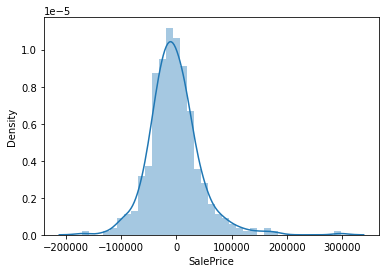

In [1008]:
sns.distplot(residual)

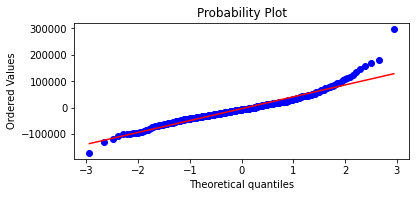

In [1009]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

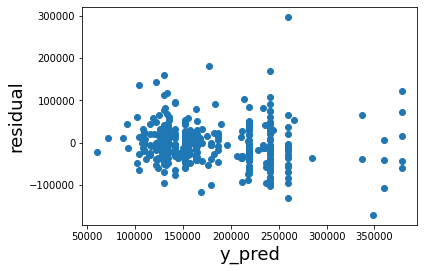

In [1010]:
# Plot the patterns of the error terms
plt.scatter(y_pred,residual)
plt.xlabel('y_pred', fontsize = 18)    
plt.ylabel('residual', fontsize = 18)    
plt.show()

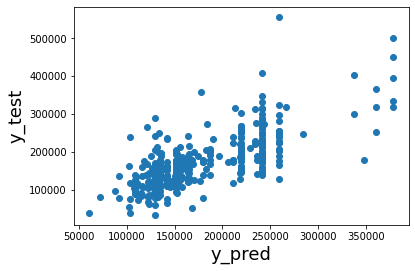

In [1011]:
# Plot the patterns of the error terms
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred', fontsize = 18)    
plt.ylabel('y_test', fontsize = 18)    
plt.show()

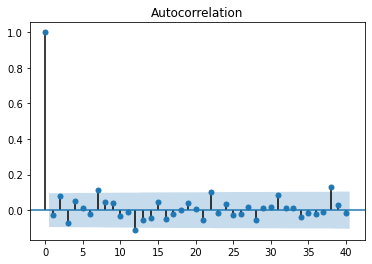

In [1012]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

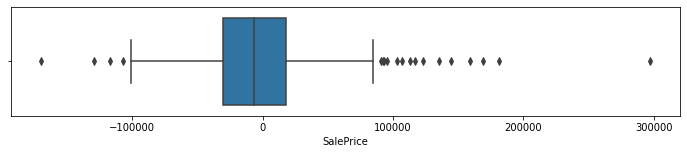

In [1013]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=residual,whis=1.5)

In [1014]:
ridge_pred = ridge.predict(X_test)
residual_ridge = y_test - ridge_pred

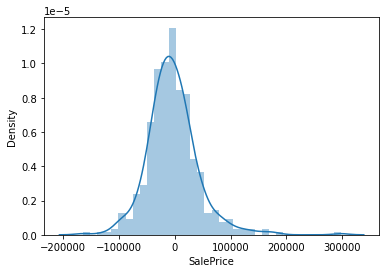

In [1015]:
sns.distplot(residual_ridge)

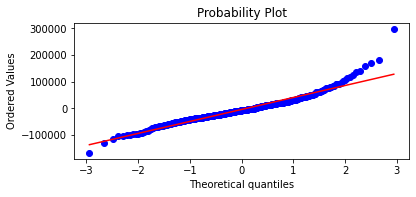

In [1016]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual_ridge, plot=ax, fit=True)

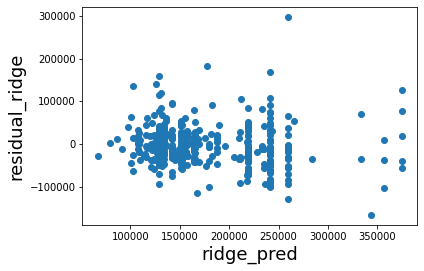

In [1017]:
# Plot the patterns of the error terms
plt.scatter(ridge_pred,residual_ridge)
plt.xlabel('ridge_pred', fontsize = 18)    
plt.ylabel('residual_ridge', fontsize = 18)    
plt.show()

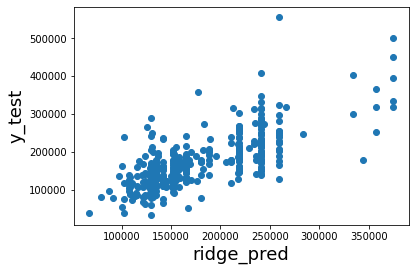

In [1018]:
# Plot the patterns of the error terms
plt.scatter(ridge_pred,y_test)
plt.xlabel('ridge_pred', fontsize = 18)    
plt.ylabel('y_test', fontsize = 18)    
plt.show()

From above graph it's clear that errors are normally distribured and variance of the residuals is constant across predictions

Lets observe the changes in the coefficients after regularization

In [1019]:
betas = pd.DataFrame(index=X_train.columns)

In [1020]:
betas.rows = X_train.columns

In [1021]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1022]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge          Lasso
LandContour_Bnk      -8367.130496      -6.321777
LandContour_HLS      13652.796990   21550.945340
LandContour_Low       5718.030323   14034.968937
LandContour_Lvl     -11003.696816   -3291.165253
Utilities_AllPub         0.000000       0.000000
Utilities_NoSeWa         0.000000       0.000000
MasVnrType_BrkCmn   -40749.814872  -43973.826031
MasVnrType_BrkFace  -17902.383729  -18371.414336
MasVnrType_None     -40296.190899  -40477.270246
ExterQual_Ex        122150.695155  170204.340881
ExterQual_Fa        -81463.200727  -45780.968985
ExterQual_Gd          6431.368341   51036.455771
ExterQual_TA        -47118.862769   -3195.603010
Foundation_BrkTil     2877.674677       0.000000
Foundation_CBlock     8766.384330    6152.121222
Foundation_PConc     32069.395914   28982.663294
Foundation_Slab     -13224.973147  -15995.518769
Foundation_Stone    -27787.748808  -36416.035141
Foundation_Wood      -2700.732967   -2328.974519
HeatingQC_Ex          8930.642071   11025.456244
HeatingQC_Fa         -5989.510725   -2899.789551
HeatingQC_Gd           959.211359    3523.910564
HeatingQC_TA         -3900.342705   -1220.317849
PavedDrive_N         -9594.866807   -7009.350760
PavedDrive_P         -1571.623348       0.000000
PavedDrive_Y         11166.490156   12951.165006

#conclusion
Above Variables are significant in predicting the price of a house,

#Assignment Part-II

#Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ridge Regression

In [1023]:
#Change the alpha value from 1 to 2
alpha = 2
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)

Ridge(alpha=2)

In [1024]:
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

In [1025]:
get_error_stats(y_train,y_pred_train, y_test,y_pred_test)

r2_train_lr  0.5972461858002873
r2_test_lr 0.5373972475103046
rss1_lr 2324591904918.009
rss2_lr 912309348729.0409
mse_train_lr 2350446819.9373193
mse_test_lr 2146610232.3036256


[0.5972461858002873,
 0.5373972475103046,
 2324591904918.009,
 912309348729.0409,
 48481.406950884986,
 46331.525253369604]

Lasso

In [1026]:
#Changed alpha 10 to 20
alpha =20
lasso_20 = Lasso(alpha=alpha)
lasso_20.fit(X_train, y_train) 

Lasso(alpha=20)

In [1027]:
y_pred_train = lasso_20.predict(X_train)
y_pred_test = lasso_20.predict(X_test)

In [1028]:
get_error_stats(y_train,y_pred_train, y_test,y_pred_test)

r2_train_lr  0.5982026388097288
r2_test_lr 0.536560553725418
rss1_lr 2319071503012.94
rss2_lr 913959411461.8442
mse_train_lr 2344865018.213286
mse_test_lr 2150492732.851398


[0.5982026388097288,
 0.536560553725418,
 2319071503012.94,
 913959411461.8442,
 48423.806316865324,
 46373.40544807334]

R2score on training data has increased but it has decreased on testing data

In [1029]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso_20'] = lasso_20.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge2          Ridge          Lasso       Lasso_20
LandContour_Bnk      -8420.997804   -8367.130496      -6.321777      -0.000000
LandContour_HLS      13707.722721   13652.796990   21550.945340   21201.212564
LandContour_Low       5228.447730    5718.030323   14034.968937   13434.175250
LandContour_Lvl     -10515.172648  -11003.696816   -3291.165253   -3319.096340
Utilities_AllPub         0.000000       0.000000       0.000000       0.000000
Utilities_NoSeWa         0.000000       0.000000       0.000000       0.000000
MasVnrType_BrkCmn   -37099.440860  -40749.814872  -43973.826031  -42808.413040
MasVnrType_BrkFace  -17198.797662  -17902.383729  -18371.414336  -18052.042093
MasVnrType_None     -39900.939095  -40296.190899  -40477.270246  -40228.161602
ExterQual_Ex        117365.700121  122150.695155  170204.340881  169853.740174
ExterQual_Fa        -74506.420184  -81463.200727  -45780.968985  -44681.641538
ExterQual_Gd          5008.247602    6431.368341   51036.455771   50945.324219
ExterQual_TA        -47867.527539  -47118.862769   -3195.603010   -3191.450256
Foundation_BrkTil     1466.727247    2877.674677       0.000000       0.000000
Foundation_CBlock     7203.172640    8766.384330    6152.121222    6187.611640
Foundation_PConc     31039.845215   32069.395914   28982.663294   29160.770755
Foundation_Slab     -14068.222735  -13224.973147  -15995.518769  -15493.996918
Foundation_Stone    -23147.431853  -27787.748808  -36416.035141  -33629.627374
Foundation_Wood      -2494.090515   -2700.732967   -2328.974519      -0.000000
HeatingQC_Ex          9364.253324    8930.642071   11025.456244   11071.170992
HeatingQC_Fa         -6245.384234   -5989.510725   -2899.789551   -2689.973546
HeatingQC_Gd           870.318927     959.211359    3523.910564    3432.655671
HeatingQC_TA         -3989.188018   -3900.342705   -1220.317849   -1200.172703
PavedDrive_N        -10049.916674   -9594.866807   -7009.350760   -7060.130646
PavedDrive_P         -1230.856517   -1571.623348       0.000000       0.000000
PavedDrive_Y         11280.773190   11166.490156   12951.165006   12869.222158

#Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1030]:
X_train.columns

Index(['LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_TA',
       'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y'],
      dtype='object')

Below are the top predictor variables. So we will drop them and rerun the model.
LandContour
Utilities
MasVnrType
MasVnrType
ExterQual


In [1031]:
X_train1 = X_train.drop(['LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low','LandContour_Lvl', 'Utilities_AllPub'],axis=1)
X_test1 = X_test.drop(['LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low','LandContour_Lvl', 'Utilities_AllPub'],axis=1)

Lasso

In [1032]:
#alpha as 10
alpha =10
lasso_10 = Lasso(alpha=alpha)
lasso_10.fit(X_train1, y_train) 

Lasso(alpha=10)

In [1033]:
y_pred_train = lasso_10.predict(X_train1)
y_pred_test = lasso_10.predict(X_test1)

In [1034]:
get_error_stats(y_train,y_pred_train, y_test,y_pred_test)

r2_train_lr  0.5935022716962545
r2_test_lr 0.527373892742806
rss1_lr 2346200818631.803
rss2_lr 932076633317.8208
mse_train_lr 2372296075.461884
mse_test_lr 2193121490.1595783


[0.5935022716962545,
 0.527373892742806,
 2346200818631.803,
 932076633317.8208,
 48706.22214319115,
 46830.77503265965]

R2score of training and testing data has decreased

In [1035]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns
betas['lasso_10'] = lasso_10.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

lasso_10
Utilities_NoSeWa         0.000000
MasVnrType_BrkCmn   -44201.931391
MasVnrType_BrkFace  -19681.720342
MasVnrType_None     -41457.646123
ExterQual_Ex        170869.562507
ExterQual_Fa        -39675.127784
ExterQual_Gd         50672.626955
ExterQual_TA         -3181.644740
Foundation_BrkTil        0.000000
Foundation_CBlock     6760.057260
Foundation_PConc     30638.458769
Foundation_Slab     -17029.959895
Foundation_Stone    -30994.487830
Foundation_Wood      -1108.093887
HeatingQC_Ex         10544.871699
HeatingQC_Fa         -1944.306120
HeatingQC_Gd          4005.067868
HeatingQC_TA         -1501.858245
PavedDrive_N        -10524.746786
PavedDrive_P             0.000000
PavedDrive_Y          9194.085394